Michael Tong - Problem Set 1 Q4

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

In [2]:
df_m = pd.read_csv("./../../data/boston_housing/boston_housing_compiled.csv")
print("Original dataset shape:", df_m.shape)

Original dataset shape: (506, 14)


In [3]:
print(df_m.isna().sum())

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64


In [4]:
df = df_m.dropna()
df.shape

(452, 14)

For target regression: CRIM
Mean of target: 1.4208250442477877


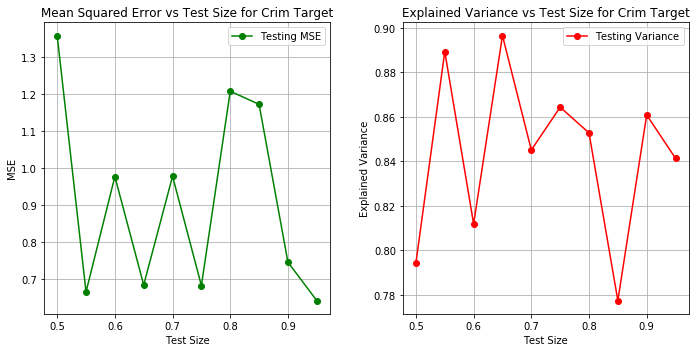


For target regression: ZN
Mean of target: 12.721238938053098


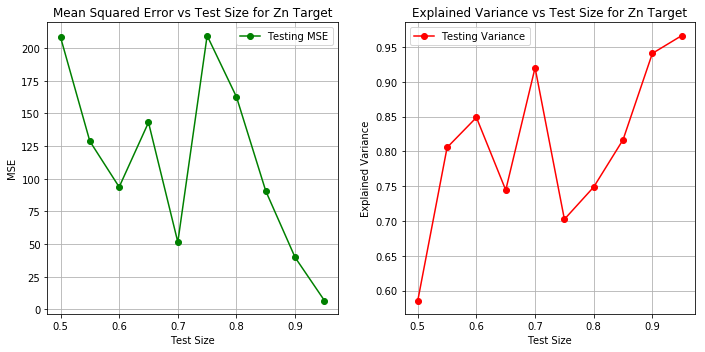

In [ ]:
for target in df.columns:
    training_MSE = []
    training_variance = []
    testing_MSE = []
    testing_variance = []
    
    train_sizes = np.linspace(0.5, 1.0, 10, endpoint=False)
    for i in train_sizes:
        X = df.drop(columns=[target], axis=1)
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-i))
        clf = DecisionTreeRegressor()
        clf.fit(X_train, y_train)
        preds_train = clf.predict(X_train)
        preds_test = clf.predict(X_test)
        training_MSE.append(mean_squared_error(y_true=y_train, y_pred=preds_train))
        training_variance.append(explained_variance_score(y_true=y_train, y_pred=preds_train))
        testing_MSE.append(mean_squared_error(y_true=y_test, y_pred=preds_test))
        testing_variance.append(explained_variance_score(y_true=y_test, y_pred=preds_test))

    print("For target regression:", target)
    print("Mean of target:", df[target].mean())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ax1.plot(train_sizes, testing_MSE, 'o-', color="g",
             label="Testing MSE")
    ax1.legend(loc="best")
#     ax1.title("Mean Squared Error vs Test Size for {} Target".format(target.capitalize()))
    ax1.set_xlabel('Test Size')
    ax1.set_ylabel('MSE')
    ax1.set_title('Mean Squared Error vs Test Size for {} Target'.format(
        target.capitalize()))
    ax1.grid()
    
    ax2.plot(train_sizes, testing_variance, 'o-', color="r",
             label="Testing Variance")
    ax2.legend(loc="best")
    ax2.set_xlabel('Test Size')
    ax2.set_ylabel('Explained Variance')
    ax2.set_title('Explained Variance vs Test Size for {} Target'.format(
        target.capitalize()))
    ax2.grid()
    
    plt.tight_layout()
    plt.show()
    

#     print("MSE:", mean_squared_error(y_true=y_test, y_pred=preds))
#     print("Explained variance:", explained_variance_score(y_true=y_test, y_pred=preds))
    print()